# Task 5: Group Analysis

After individual analysis, we will be performing analysing the US baby name dataframe as a team here. 
Jamie and Rita analyzed the states level csv file and Leo analyzed the National level csv file.
After discussion, we will be answering the three research questions as following:

### Research Question 1

What is the top 5 names from 1910 to 2015 in the US? How similar is it with the top 5 names in four US regions (North_East, South, West, Middle_West)?

### Research Question 2

Compare the most popular name at the state and national level in a decade (2000-2014). What is the most popular name in each year from 2000-2014?


### Research Question 3
What is the most popular national female name from 1910-2015? How about in each of the four regions? When does this name become popular (trend)? 
___

## Importing necessary modules and seperate data into 4 regions

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scripts import project_functions as pf

In [29]:
national_df = pf.load_and_process_one('../../data/raw/national/NationalNames.csv')
national_df

,Name,Year,Gender,Count
0,Mary,1910,F,22848
1,Helen,1910,F,10479
2,Margaret,1910,F,8226
3,Dorothy,1910,F,7318
4,Ruth,1910,F,7212
...,...,...,...,...
1736485,Zykeem,2014,M,5
1736486,Zymeer,2014,M,5
1736487,Zymiere,2014,M,5
1736488,Zyran,2014,M,5


In [30]:
# Load 4 parts of raw data on State Names
state_df = pf.load_and_process_many("../../data/raw/state")

# Note that the project_fuctions module includes list of abbreviations for states separated in regions
# import the regional datasets
def get_state_df(state_list, source=state_df):
    return source.loc[source["State"].isin(state_list)].reset_index(drop=True)


n_df = get_state_df(pf.NORTH_EAST) # North East data set
s_df = get_state_df(pf.SOUTH)      # South data set
mw_df = get_state_df(pf.MID_WEST)  # Mid West data set
w_df = get_state_df(pf.WEST)    # West data set

In [31]:
# Sample data frame
w_df

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7
...,...,...,...,...,...
1156146,Seth,2014,M,WY,5
1156147,Spencer,2014,M,WY,5
1156148,Tyce,2014,M,WY,5
1156149,Victor,2014,M,WY,5


## Method to get all time top 5 name by gender (national)

In [32]:
# Sorting top names by gender 
top_male = national_df.loc[national_df['Gender'] == 'M']
top_female = national_df.loc[national_df['Gender'] == 'F']

# Grouping and saving top 5 to a new dataframe
def get_top5_national(data):
    return data.groupby('Name',as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head().reset_index(drop=True)
top_5_names = get_top5_national(national_df)
top_5_male = get_top5_national(top_male)
top_5_female = get_top5_national(top_female)

In [33]:
top_5_names

,Name,Year,Count
0,James,412020,4961239
1,John,412020,4849928
2,Robert,412020,4730221
3,Michael,412020,4318076
4,William,412020,3843856


In [34]:
top_5_male

,Name,Year,Count
0,James,206010,4938968
1,John,206010,4829733
2,Robert,206010,4710618
3,Michael,206010,4296488
4,William,206010,3829026


In [35]:
top_5_female

,Name,Year,Count
0,Mary,206010,3730968
1,Patricia,206010,1568838
2,Elizabeth,206010,1500534
3,Jennifer,190700,1462742
4,Linda,206010,1448479


## Method to get all time top 5 in each region

In [36]:
# Define processing function
def get_top5_all_time(data=None):
    if data is None:
        return data
    return (data.groupby(by="Name").sum()
              .drop(columns=["Year"]) # We do not analyze with time
              .sort_values(by="Count", ascending=False)
              .reset_index()
              .head()
           )
# For the middle_west
top5_mw = get_top5_all_time(mw_df)
# For the west
top5_w = get_top5_all_time(w_df)
# For the North
top5_n = get_top5_all_time(n_df)
# For the south
top5_s = get_top5_all_time(s_df)

In [37]:
# Sample data frame
top5_w 

,Name,Count
0,Michael,748282
1,Robert,652150
2,David,647996
3,John,589500
4,James,545148


## Method to get all time top 5 in each region based on gender

In [38]:
# Function for filter data based on gender
def get_top5_gender(data, region, gender):
    return (data.loc[data["Gender"] == gender]
                    .groupby(by="Name").sum()
                    .sort_values(by="Count", ascending=False)
                    .head()
                    .drop(columns="Year") # We do not care about year
                    .assign(Region=region, Gender=gender)
                    .reset_index()
            )

# In the North East
top5_male_n, top5_female_n = get_top5_gender(n_df, "NE", "M"), get_top5_gender(n_df, "NE", "F")

# In the South
top5_male_s, top5_female_s = get_top5_gender(s_df, "S", "M"), get_top5_gender(s_df, "S", "F")

# In the West
top5_male_w, top5_female_w = get_top5_gender(w_df, "W", "M"), get_top5_gender(w_df, "W", "F")

# In the Mid West
top5_male_mw, top5_female_mw = get_top5_gender(mw_df, "MW", "M"), get_top5_gender(mw_df, "MW", "F")                             

In [39]:
# Sample data frame
top5_female_s

,Name,Count,Region,Gender
0,Mary,1468270,S,F
1,Elizabeth,504704,S,F
2,Linda,491563,S,F
3,Patricia,452636,S,F
4,Betty,451978,S,F


In [40]:
top5_female_w

,Name,Count,Region,Gender
0,Mary,339339,W,F
1,Jennifer,301413,W,F
2,Jessica,234652,W,F
3,Elizabeth,228588,W,F
4,Patricia,208413,W,F


## Method to get most popular female name in 1910 and its proportion from 1910 to 2015 in each region

In [41]:
def get_top_1910_fname(data, region=None):
    if data is None:
        return data
    top_fname = (data.loc[data["Year"] == 1910]
                   .groupby(by="Name").sum()
                   .drop(columns="Year")
                   .sort_values(by="Count", ascending=False)
                   .index[0]
                )
    # Pivot table of Years vs Name 
    fname_year = (data.loc[data["Name"] == top_fname]
                .pivot_table(index="Year",columns="Name",values="Count", aggfunc=np.sum)
            )
    # Find the total count in each year
    y = data.groupby(by="Year").agg(np.sum)

    # Divide each row (year) by the total of that year
    for year in range(1910, 2015):
        fname_year.loc[year,:] = fname_year.loc[year,:]/y.loc[year,"Count"]

    return fname_year

# Top female name of North East in 1910 and its trend
f_name_n = get_top_1910_fname(data=n_df, region="NE")

# Top female name of North East in 1910 and its trend
f_name_s = get_top_1910_fname(data=s_df, region="S")

# Top female name of North East in 1910 and its trend
f_name_w = get_top_1910_fname(data=w_df, region="W")

# Top female name of North East in 1910 and its trend
f_name_mw = get_top_1910_fname(data=mw_df, region="MW")


In [42]:
# Sample data frame
f_name_w 

Name,Mary
Year,
1910,0.042355
1911,0.042245
1912,0.034384
1913,0.030812
1914,0.030345
...,...
2010,0.000531
2011,0.000519
2012,0.000493


## Method to get most popular name in a decade (regional and national)

In [43]:
def get_top_in_interval(data=None, region=None, begin=2000, stop=2014):
    top = list()
    # Extract only the year in interest
    for year in range(begin, stop+1):
        top_in_year =   (data.loc[data["Year"] == year]
                         .groupby(by="Name").sum()
                         .sort_values(by="Count", ascending=False)
                         .assign(Year=year)
                         .reset_index()
                         .iloc[0]
                        )
        
        top.append(top_in_year)

    top_in_interval = (pd.concat(top, axis=1, ignore_index=True).T
                         .assign(Region=region)
                      )
    return top_in_interval

top_eachyear_s = get_top_in_interval(s_df, "South")
top_eachyear_n = get_top_in_interval(n_df, "North East")
top_eachyear_ws= get_top_in_interval(mw_df, "Midwest")
top_eachyear_w = get_top_in_interval(w_df, "West")

In [44]:
# Sample data set
top_eachyear_w 

,Name,Year,Count,Region
0,Jacob,2000,7199,West
1,Jacob,2001,6910,West
2,Jacob,2002,6611,West
3,Jacob,2003,6580,West
4,Daniel,2004,6486,West
5,Daniel,2005,6098,West
6,Daniel,2006,6135,West
7,Daniel,2007,6209,West
8,Daniel,2008,5933,West
9,Isabella,2009,5639,West


In [45]:
top_eachyear_s

,Name,Year,Count,Region
0,Jacob,2000,12405,South
1,Jacob,2001,11839,South
2,Jacob,2002,11228,South
3,Jacob,2003,11063,South
4,Jacob,2004,10611,South
5,Jacob,2005,9699,South
6,Jacob,2006,9351,South
7,Jacob,2007,9222,South
8,Jacob,2008,8424,South
9,Jayden,2009,7982,South


## Getting the top female name and finding the occurence count for each region for each year since 1910

In [46]:
# Getting the top female name from the national dataset (National)
top_f = top_5_female.loc[0,'Name']
# Cleaning dataframe to only show top name, and its count value for each year 
top_national_f = national_df.loc[national_df['Name'] == top_f].groupby("Year").sum().rename(columns={"Count":top_f + " (National)"})
top_national_f 

,Mary (National)
Year,
1910,22947
1911,24488
1912,32421
1913,36767
1914,45471
...,...
2010,2862
2011,2701
2012,2571


In [47]:
# Getting the top female name from the national dataset (National)
top_f_s = top5_female_s.loc[0,'Name']
# Cleaning dataframe to only show top name, and its count value for each year 
top_south_f = s_df.loc[s_df['Name'] == top_f_s].groupby("Year").sum().rename(columns={"Count":top_f_s + " (South)"})
top_south_f 

,Mary (South)
Year,
1910,9680
1911,9335
1912,12041
1913,13386
1914,16017
...,...
2010,1397
2011,1369
2012,1274


In [48]:
# Getting the top female name from the national dataset (North East)
top_f_n = top5_female_n.loc[0,'Name']
# Cleaning dataframe to only show top name, and its count value for each year 
top_north_f = n_df.loc[n_df['Name'] == top_f_n].groupby("Year").sum().rename(columns={"Count":top_f_s + " (North East)"})
top_north_f

,Mary (North East)
Year,
1910,7528
1911,8754
1912,11397
1913,12871
1914,16650
...,...
2010,519
2011,406
2012,408


In [49]:
# Getting the top female name from the national dataset (West)
top_f_w = top5_female_w.loc[0,'Name']
# Cleaning dataframe to only show top name, and its count value for each year 
top_west_f = w_df.loc[w_df['Name'] == top_f_w].groupby("Year").sum().rename(columns={"Count":top_f_s + " (West)"})
top_west_f 

,Mary (West)
Year,
1910,1115
1911,1238
1912,1750
1913,1908
1914,2385
...,...
2010,415
2011,399
2012,380


In [50]:
# Getting the top female name from the national dataset (Midwest)
top_f_mw = top5_female_mw.loc[0,'Name']
# Cleaning dataframe to only show top name, and its count value for each year 
top_midwest_f = mw_df.loc[mw_df['Name'] == top_f_n].groupby("Year").sum().rename(columns={"Count":top_f_s + " (MidWest)"})
top_midwest_f

,Mary (MidWest)
Year,
1910,5036
1911,5597
1912,7827
1913,9258
1914,11197
...,...
2010,584
2011,566
2012,546


In [51]:
# merging the dataframes of each region into one
merged_df_f = pd.concat([top_national_f,top_north_f,top_south_f,top_west_f,top_midwest_f], axis=1)
# Find the total count in each year

year_l = [national_df.groupby(by="Year").sum(), n_df.groupby(by="Year").sum(), s_df.groupby(by="Year").sum(), w_df.groupby(by="Year").sum(), 
         mw_df.groupby(by="Year").sum()]
# Divide each col (Name) by the total of each year
for i in range(len(merged_df_f.columns)):
    merged_df_f.iloc[:,i] = merged_df_f.iloc[:,i]/ year_l[0]["Count"]

merged_df_f 

,Mary (National),Mary (North East),Mary (South),Mary (West),Mary (MidWest)
Year,,,,,
1910,0.038846,0.012744,0.016387,0.001888,0.008525
1911,0.038009,0.013588,0.014489,0.001922,0.008687
1912,0.032813,0.011535,0.012187,0.001771,0.007922
1913,0.032335,0.011319,0.011772,0.001678,0.008142
1914,0.032105,0.011756,0.011309,0.001684,0.007906
...,...,...,...,...,...
2010,0.000776,0.000141,0.000379,0.000113,0.000158
2011,0.000741,0.000111,0.000375,0.000109,0.000155
2012,0.000706,0.000112,0.000350,0.000104,0.000150


## Research Question 1:

What is the top 5 names from 1910 to 2015 in the US? How similar is it with the top 5 names in four US regions (North_East, South, West, Middle_West)?

---

## Visualisation 1.1 : Top 5 names of all time (North and South)

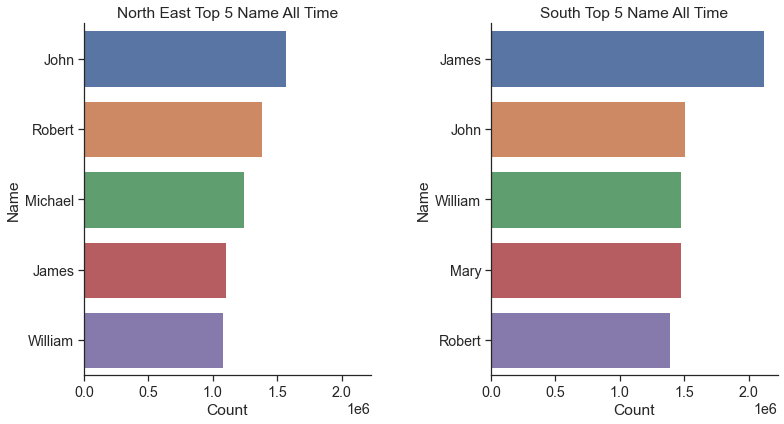

In [52]:
# Check similarity between 2 regions
sns.set_theme(context="notebook", style="ticks",  font_scale=1.3)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7),sharex=True)
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top5_n,
            order=top5_n["Name"],
            ax=ax[0]
            )
north.set_title("North East Top 5 Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top5_s,
            order=top5_s["Name"],
            ax=ax[1])
south.set_title("South Top 5 Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

**Figure 1.0** Barplot of the top 5 most popular name in northern states (left) and soutern states (right) from 1910-2015.

## Visualisation 1.2 : Top 5 names of all time (West and Midwest)

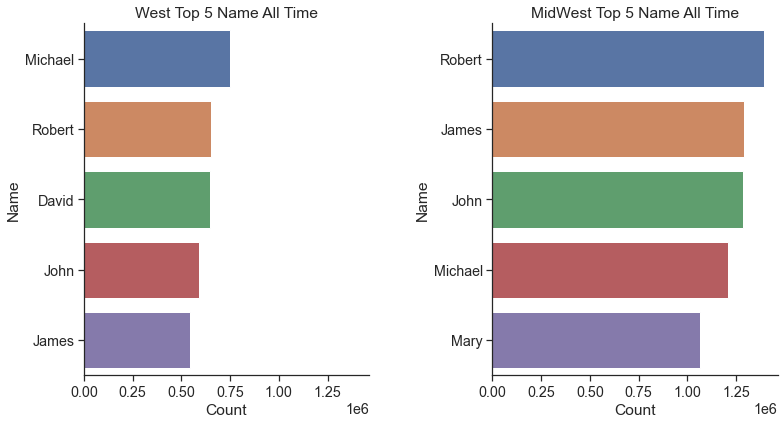

In [60]:
# Check similarity between 2 regions
sns.set_theme(context="notebook", style="ticks",  font_scale=1.3)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7),sharex=True)
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top5_w,
            order=top5_w["Name"],
            ax=ax[0]
            )
north.set_title("West Top 5 Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top5_mw,
            order=top5_mw["Name"],
            ax=ax[1])
south.set_title("MidWest Top 5 Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

**Figure 2.0** Barplot of the top 5 most popular name in western states (left) and mid_western states (right) from 1910-2015.

### Observation

From Figure 1.0, we see that the top 5 most popular names in northern and southern sates are very similas. Four of the five are the same which are John, Willam, John, and Roberts. The only difference is Mary replace Michael in souterh states most popoular names.

As for Figure 2.0, we also see James, John, Michael and Roberts in both western and mid_western states. Only western states has David on the list. Mid_western states has Mary instead.

The general analysis of states level shows that **there is a trend in naming between the four regions**: James, John, and Roberts are on the list for all four regions. Michael are on the list for three of the four regions, and Mary are on the list for two of the four.

## Visualisation 1.3 : Top 5 names of all time (National)

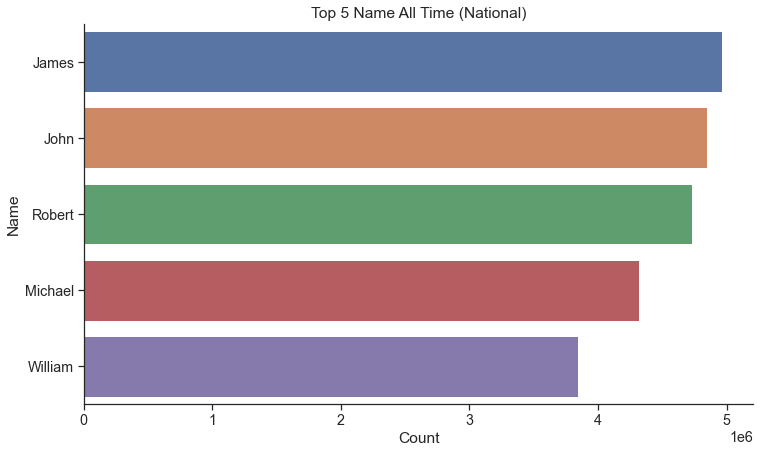

In [54]:
# Check similarity between 2 regions
# Check similarity between 2 regions
sns.set_theme(context="notebook", style="ticks",  font_scale=1.3)
fig, _ = plt.subplots(nrows=1, ncols=1, figsize=(12,7))
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top_5_names,
            order=top_5_names["Name"]
            )
north.set_title("Top 5 Name All Time (National)")

# Show plot
sns.despine()
plt.show()

**Figure 3.0** Barplot of the top 5 most popular name in the US from 1910-2015

## Observations & Summary


Figure 3.0 shows that the top 5 most popular name at all time among the US are: James, John, Roberts, Michael, William. 

Continue with the previous analysis at states level, we found **the most popular names at the national level is exactly the same as the northern states**. James, John, Roberts are the three most popular names in all four regions and in the entire US. This is a very interesting finding as we see a very similar naming trend at the states and national level in the 100 years.

## Visualisation 1.4: Top 5 names per region seperated by gender (North and South)

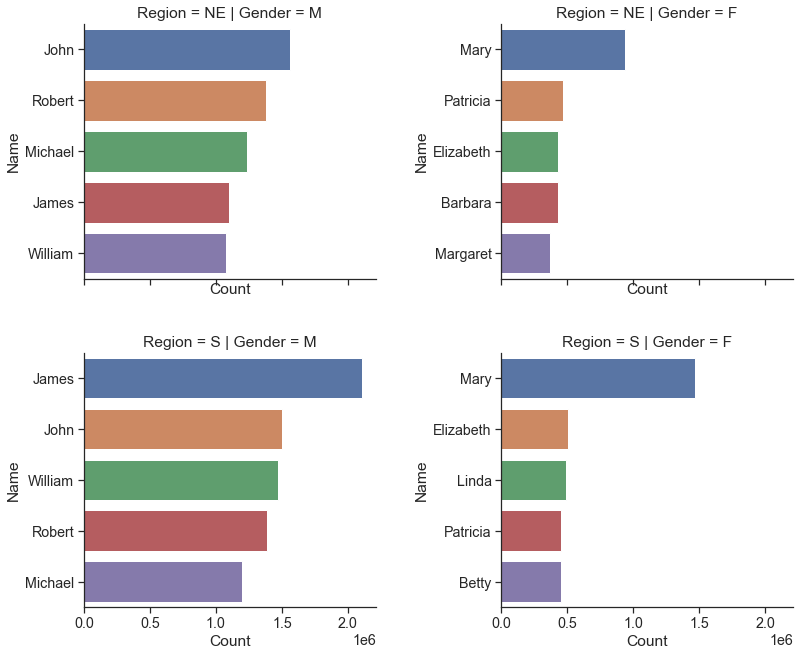

In [55]:
sns.set_theme(style="ticks", font_scale=1.3)
fig,ax= plt.subplots(2,2, figsize=(12,10), sharex=True)

data_list = [[top5_male_n,top5_female_n],[top5_male_s,top5_female_s]]   
def draw_gender_plot(axes, data_list, result_axes=None):
    if result_axes is None:
        result_axes = list()
    for i in range(2):
        for j in range(2):
            data = data_list[i][j]
            ax_ij = sns.barplot(x="Count",
                          y="Name",
                          data=data,
                          ax=ax[i][j]
                         )
            region, gender =data["Region"][0], data["Gender"][0]
            ax_ij.set_title(f"Region = {region} | Gender = {gender}")
            result_axes.append(ax_ij)
            
    return result_axes

ax = draw_gender_plot(ax, data_list)
sns.despine()
fig.tight_layout(pad=2.5)
plt.show()

**Figure 4.0** Barplots of the top 5 most popular female names (right) and Male (Left) names from 1910-2015. The names from north_eastern states are presented on the top and southern states are presented at the bottom.

## Observations

The top 5 most popular males name are James, John, William, Roberts and Michael in both southern and north eastern states. 
The female names are slightly different between the two regions. Mary, Elizabeth and Patricia are on the list in both regions, with
Barbara and Magrete on the list in northern states, Linda and Betty in southern states.


## Visualisation 1.5: Top 5 names per region seperated by gender (West and Midwest)

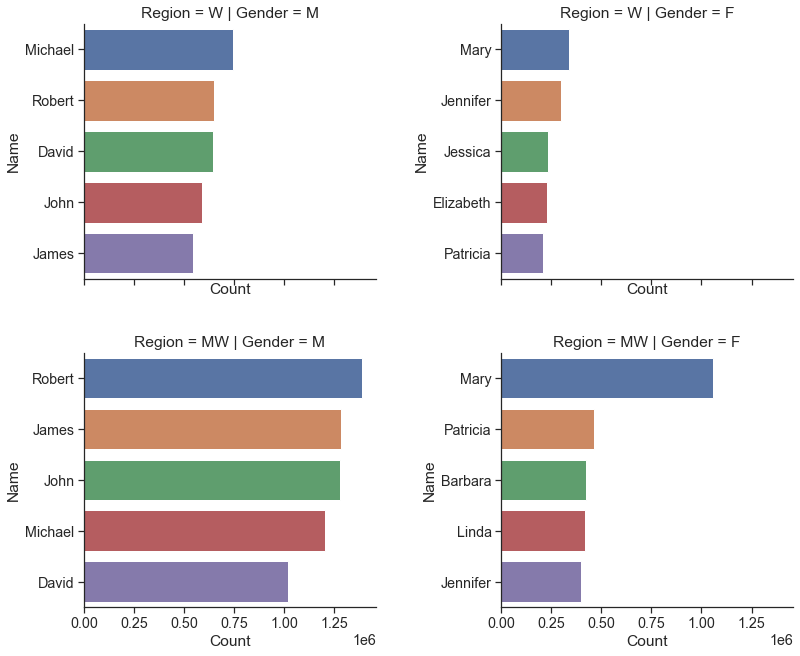

In [56]:
sns.set_theme(style="ticks", font_scale=1.3)
fig,ax= plt.subplots(2,2, figsize=(12,10), sharex=True)

data_list = [[top5_male_w,top5_female_w],[top5_male_mw,top5_female_mw]]   
def draw_gender_plot(axes, data_list, result_axes=None):
    if result_axes is None:
        result_axes = list()
    for i in range(2):
        for j in range(2):
            data = data_list[i][j]
            ax_ij = sns.barplot(x="Count",
                          y="Name",
                          data=data,
                          ax=ax[i][j]
                         )
            region, gender =data["Region"][0], data["Gender"][0]
            ax_ij.set_title(f"Region = {region} | Gender = {gender}")
            result_axes.append(ax_ij)
            
    return result_axes

ax = draw_gender_plot(ax, data_list)
sns.despine()
fig.tight_layout(pad=2.5)
plt.show()

**Figure 5.0** Barplots of the top 5 most popular female names (Right) and Male (Left) names from 1910-2015. The names from western states are presented on the top and mid_western states are presented at the bottom.

### Observations

From Figure 5.0, we see the top 5 most popular males names are James, John, William, Roberts and Michael in both southern and north eastern states. 
The female names are slightly different between the two regions. Mary, Elizabeth and Patricia are on the list in both regions, with
Barbara and Magrete on the list in northern states, Linda and Betty are on the list in southern states.

## Summary
At the states level, we found that **James, John, Roberts, Michael continue to be the most popular male name in all regions**. David is more popular in western and mid_western states; William is more popular in norther_eastern and soutern states.

As for the female names, first thing we found is there are much less number of count than the male names. Secondly, less similarity is being seen between the regions.  **Two female names, Mary and Patrica are on the list for all four regions**. Each of the four state region has its own unique popular names. North east:Magarate, South states: Betty, Western(Jessica).

## Visualisation 1.6: Top 5 names per region seperated by gender (National)

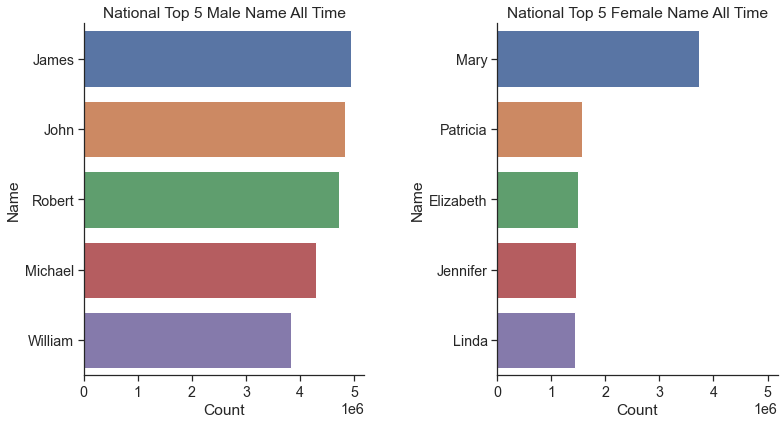

In [64]:
# Check similarity between 2 regions
# Check similarity between 2 regions
sns.set_theme(context="notebook", style="ticks",  font_scale=1.3)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7),sharex=True)
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top_5_male,
            order=top_5_male["Name"],
            ax=ax[0]
            )
north.set_title("National Top 5 Male Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top_5_female,
            order=top_5_female["Name"],
            ax=ax[1])
south.set_title("National Top 5 Female Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

**Figure 6.0** Barplots of the top 5 most popular Male names (Right) and Female (Left) names in the US from 1910-2015. 

## Observations:

From Figure 6.0, we see the top 5 most popular males name in the US is James, John, William, David and Michael. For the female names. Mary, Patrica, Elizebeth, Jennifer and Linda are the most popular names.

### Summary

In combination with the states analysis previously, we found that **the most popular national boys name is exactly the same as in both north_eastern and souther states regions.**  However, **The top 5 most popular female name at the national level did not match any regions**. Mary and Patricia are the two names that most popular in all regions and at the national level. 

In summary, **there is much similarity in boys name from 1910-2010**. Four of the five most popular boy names are the same between the regions and in the entire US. In comparison only two of the five female names are similar among the regions and at the national level.


## Research Question 2:

Compare the most popular name at the state and national level in a decade (2000-2014). What is the most popular name in each year from 2000-2014?!

---

## Visualisation 2.1: Top name of each region tracked over each year

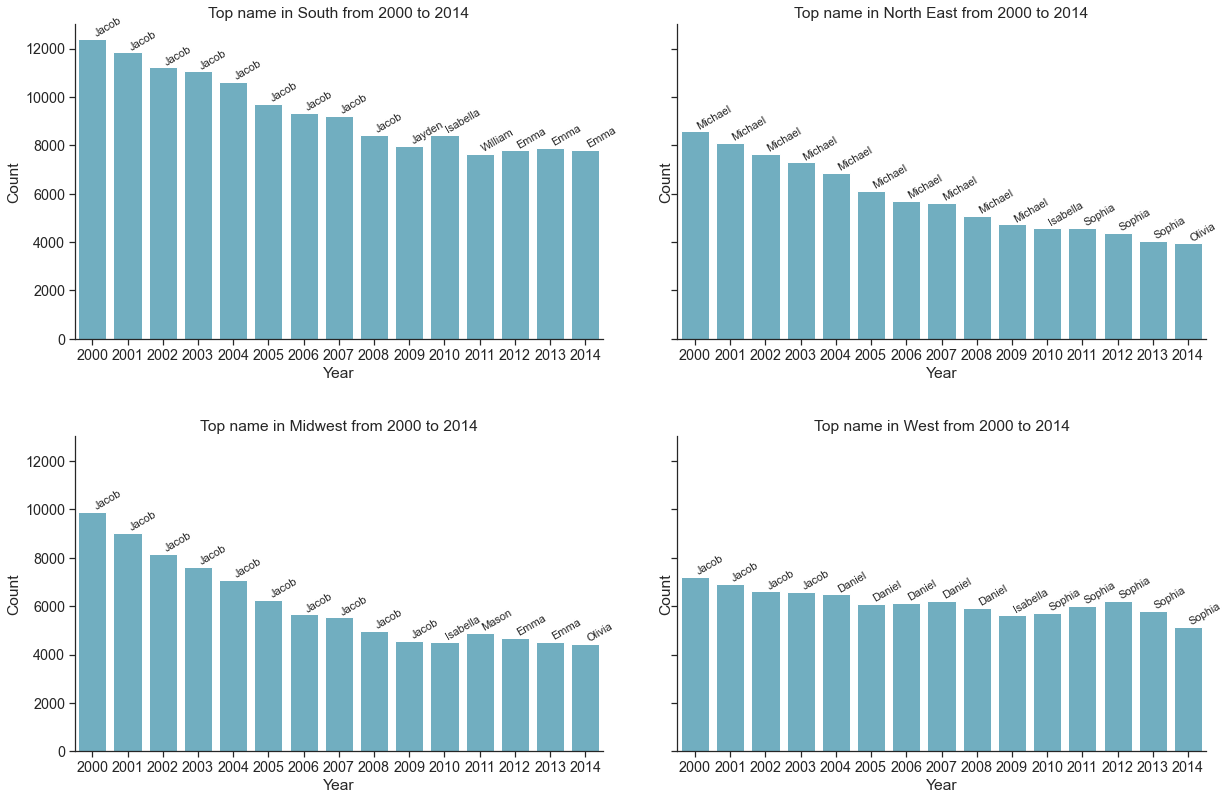

In [65]:
# Plotting the pivot table from section 2.2
# Check similarity between 2 regions
sns.set_theme(context="notebook", style="ticks",  font_scale=1.3)
fig, ax = plt.subplots(2,2,figsize=(18,12), sharey=True)

data_list = [[top_eachyear_s,top_eachyear_n], [top_eachyear_ws, top_eachyear_w]]
def draw_top_each_year_plot(axes, data_list, result_axes=None):
    if result_axes is None:
        result_axes = list()
    for i in range(2):
        for j in range(2):
            data = data_list[i][j]
            ax_ij = sns.barplot(x="Year",
                                y="Count",
                                data=data,
                                ax=ax[i][j],
                                color="c"
                                )
            region = data["Region"][0]
            ax_ij.set_title(f"Top name in {region} from 2000 to 2014")
            # Write name on bar
            for index in data.index:
                ax_ij.text(index,data.loc[index,"Count"]+100,data.loc[index,"Name"], rotation=30, fontsize=11)
            result_axes.append(ax_ij)
            
    return result_axes

draw_top_each_year_plot(ax, data_list)
plt.tight_layout(pad=2.5)
sns.despine()
plt.show()

**Figure 7.0** Barplot of the most popular name in each region at each year from 2000-2014 

## Observations & Summary
From Figure 7.0, we first notice the total number of name decrease over the years except for the western states. Name Jacob is popular in southern and Mid_western states for almost 10 year from 2000-2009. In northh_eastern states, Michael is the most popular name of the decade instead. Western states is quite unique as it shows a very diverse range of names over the time.

In summary, southern and mid_western states show similar naming trend over the decade of 2000-2010. Western states show more diverse list of names.

## Research Question 3:

What is the most popular national female name from 1910-2015? How about in each of the four regions? When does this name become popular (trend)? 

---

## Visualisation 3.1: Top female name of national set tracked over each year and each region

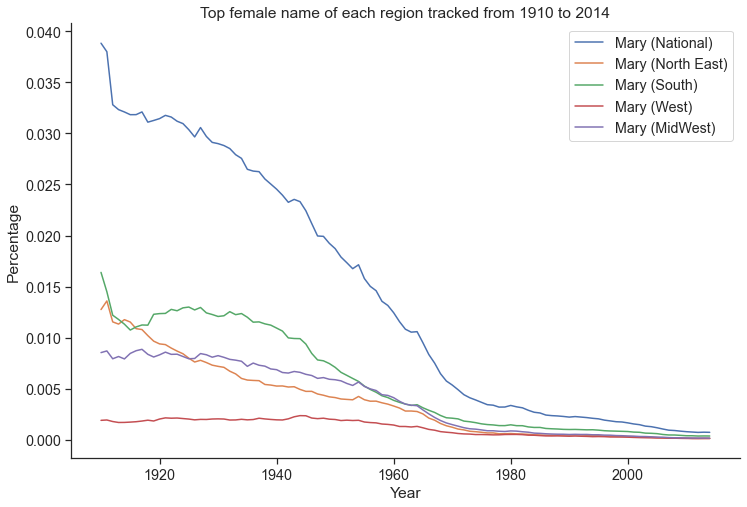

In [59]:
# Plotting the pivot table from section 2.2
sns.set_theme(context="notebook", style="ticks", font_scale=1.3)
fig, ax = plt.subplots(nrows=1, figsize=(12,8))

Chart4 = sns.lineplot(data=merged_df_f, dashes=False)
Chart4.set(title="Top female name of each region tracked from 1910 to 2014", ylabel="Percentage")
sns.despine()
plt.show()

**Figure 8.0** Lineplot of most popular female name from 1910-2014 in each four regions and in the US. 

## Observations & Summary
The graphs shows that **Mary is the most popular female name from 1910-2015 in each regions and in the entire US**. This is an interesting finding as we also see a sharp decrease trend which indicates **the names loses the popularity over time and became a rare in the 2000s.**